In [13]:
from adjustable_efficient import *
from qiskit.tools.visualization import *
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt

In [14]:
def fidelity(n,qc,f,decomposition='walsh'):
    """Generates the quantum circuit implementing the sequential decomposition of function f with the sequential operators
        whose order are contain in sequential_info 
    Parameters
    ----------
    n : int
        Number of qubit encoding the position
    qc : qiskit.circuit.quantumcircuit.QuantumCircuit
        Quantum circuit implementing f
    f : function
        Function of one variable
    decomposition : str
        'walsh' or 'sequential', it indicates the type of the decomposition for the circuit
    Plot
    -------
    """
    state = qi.Statevector.from_instruction(qc)
    L = np.array(state.data[0:2**n])
    L2 = np.angle(L)
    X = np.array(range(2**n))/2**n
    plt.plot(X,L2,marker='.',c='r')
    plt.plot(X,f(X),marker='x',c='b',linestyle='')
    plt.title(decomposition+ ' decomposition')
    plt.show()

In [15]:
n = 3
n_ancilla = 0
gray_code = True
list_operator_to_implement = [i for i in range(2**n)]

def f(x):
    return np.sin(2*np.pi*x)

q1 = QuantumRegister(n,name='q')
a1 = AncillaRegister(n_ancilla,name='a')
qc1 = QuantumCircuit(q1,a1)

q2 = QuantumRegister(n,name='q')
a2 = AncillaRegister(n_ancilla,name='a')
qc2 = QuantumCircuit(q2,a2)

qc1.h(q1)
qc2.h(q2)

walsh_decomposition = general_framework(n,f,n_ancilla,list_operator_to_implement,decomposition='walsh',gray_code=gray_code,swaps=True)
sequential_decomposition = general_framework(n,f,n_ancilla,list_operator_to_implement,decomposition='sequential',gray_code=gray_code,swaps=False)

qc1.append(walsh_decomposition,qc1.qubits)
qc2.append(sequential_decomposition,qc2.qubits)

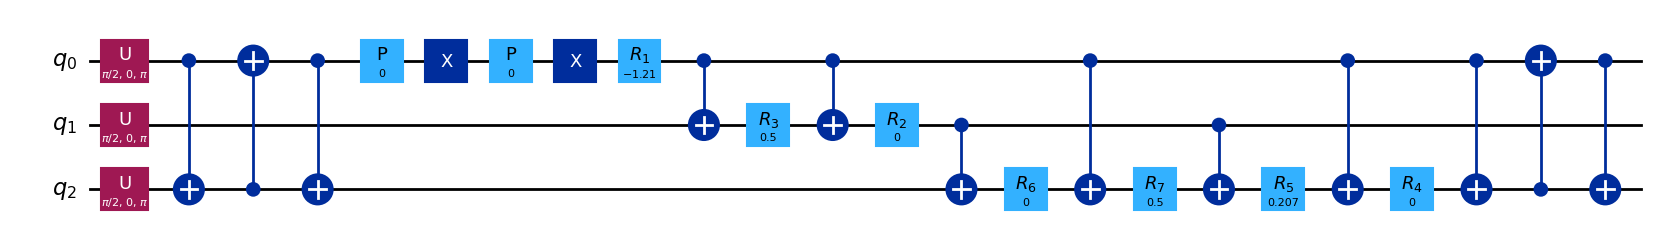

In [16]:
qc1.decompose(reps=3).draw('mpl',style='iqx')

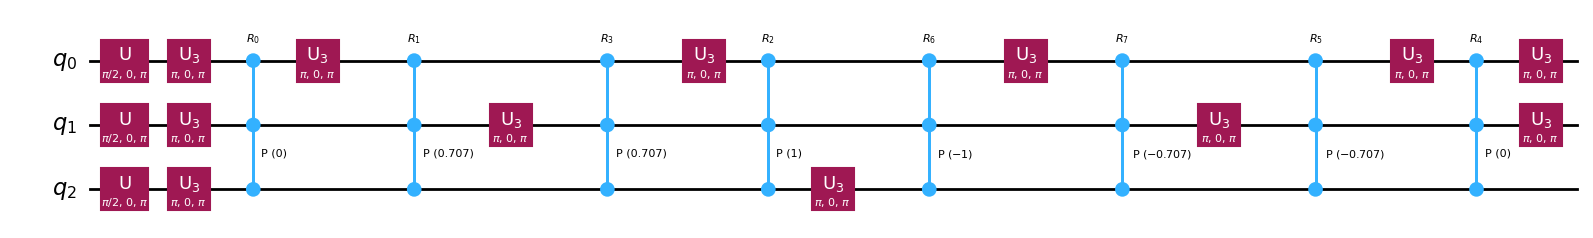

In [17]:
qc2.decompose(reps=3).draw('mpl',style='iqx')

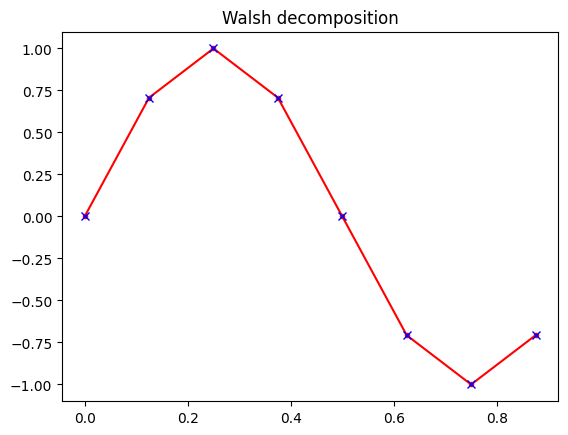

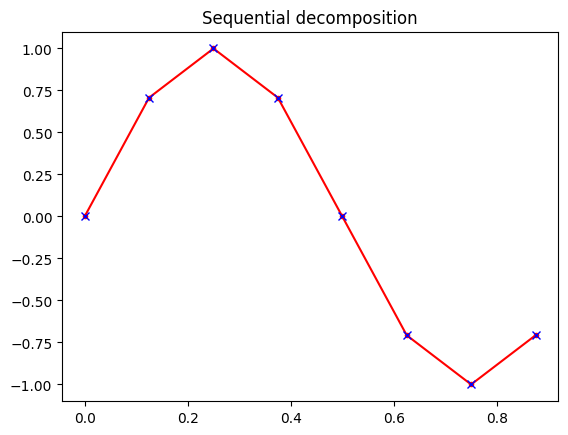

In [18]:
fidelity(n,qc1,f,decomposition='Walsh')
fidelity(n,qc2,f,decomposition='Sequential')